<center>
    <h1>Content-based LSA applied on movies</h1>
    <h2>Project and Project Work in Text Mining</h2>
    <h3>Enrico Pittini enrico.pittini@studio.unibo.it</h3>
</center>



---



In this notebook, we follow a *content-based approach*. Basically, we want to capture the similarities and relations between movies by exploiting their textual overviews. We compare the results achieved by a syntactic movel (i.e. the tf-idf model) with the semantic LSA model. We also make visualizations of the movies and words vectors onto two dimensions of the LSA, showing the ability of this powerful method to capture some semantic features of documents and words. In this first part, a subset of the [The Movie Database](https://www.themoviedb.org/) (TMDB) dataset has been used.

For more detailed informations about the used functions, look into the corresponding docstrings inside the python files, inside the `utils` folder.

## Colab initialization for accessing the repository files on GitHub
Run this section only if you are interested in achieving the repository files on GitHub. If you have already these files, and you are already in the repository folder, you don't need to run this section.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
! mkdir "gdrive/My Drive/textmining"
! cd "gdrive/My Drive/textmining"

In [3]:
! git clone "https://github.com/EnricoPittini/LSA-on-movies"

Cloning into 'LSA-on-movies'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 3), reused 25 (delta 2), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [4]:
%cd -0
%cd "LSA-on-movies"

/content
/content/LSA-on-movies


# Notebook

## Initialization

In [5]:
import numpy as np
import pandas as pd

In [6]:
# Settings for autoreloading
%load_ext autoreload
%autoreload 2

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Dataset
Dataset containing information about $7398$ movies. This dataset has been taken from [this kaggle competition](https://www.kaggle.com/competitions/tmdb-box-office-prediction/data), and it has been obtained from [The Movie Database](https://www.themoviedb.org/) (TMDB).

In [8]:
data_url = 'datasets/content-based/movies.csv'
df = pd.read_csv(data_url)

In [9]:
df.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0
3,3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0
4,4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7398 non-null   int64  
 1   id                     7398 non-null   int64  
 2   belongs_to_collection  1481 non-null   object 
 3   budget                 7398 non-null   int64  
 4   genres                 7375 non-null   object 
 5   homepage               2366 non-null   object 
 6   imdb_id                7398 non-null   object 
 7   original_language      7398 non-null   object 
 8   original_title         7398 non-null   object 
 9   overview               7376 non-null   object 
 10  popularity             7398 non-null   float64
 11  poster_path            7396 non-null   object 
 12  production_companies   6984 non-null   object 
 13  production_countries   7241 non-null   object 
 14  release_date           7397 non-null   object 
 15  runt

Among the several different features, we are interested in a specific one: the `overview`, containing the plot of the movie. 

## Preprocessing
The textual column `overview` is preprocessed. 

The following preprocessing operations are performed.
- The missing values of that column and the empty strings are removed.
- Only the alhpabetic characters are kept (the punctuation and the numbers are removed).
- All the words are transformed into lowercase.
- The stopwords are removed 
- The words with unitary length are removed 
- Some particular wrong words are removed (e.g. 'äì').
- The words are lemmatized.

The lemmatization is performed by using the [TextBlob library](https://textblob.readthedocs.io/en/dev/).

For more details, see the docstring of the function.

In [11]:
# Download the recquired packages for performing our processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
# This cell can take around one or two minutes
from utils.preprocessing import preprocess_textual_column
df = preprocess_textual_column(df, text_col='overview', lemmatize=True)

The following is the original overview, kept in the new column `original overview`.

In [13]:
df['original overview'].head()

0    When Lou, who has become the "father of the In...
1    Mia Thermopolis is now a college graduate and ...
2    Under the direction of a ruthless instructor, ...
3    Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4    Marine Boy is the story of a former national s...
Name: original overview, dtype: object

The following is instead the processed `overview`: each string is a list of lemmas.

In [14]:
df['overview'].head()

0    lou become father internet shot unknown assail...
1    mia thermopolis college graduate way genovia t...
2    direction ruthless instructor talented young d...
3    vidya bagchi vidya balan arrive kolkata london...
4    marine boy story former national swimmer find ...
Name: overview, dtype: object

In [15]:
max_tokens = df['overview'].map(lambda s: len(s.split())).max()
print(f'Maximum number of tokens of an overview: {max_tokens}')

Maximum number of tokens of an overview: 143


Now, the vocabulary is created. The vocabulary is implemented as an `np.ndarray` of words, representing the mapping from integer ids into words. The words in this array are sorted in descending order by document frequency (i.e. fraction of documents in which they appear). 

A very important point is that only the words whose document frequency is bigger than $0.0075$ (i.e. $0.75$%) are kept. Basically, this means that only the words which appear in at least $56$ documents are kept.

For more details, see the docstring of the function.

In [16]:
from utils.preprocessing import build_voc
voc = build_voc(df, text_col='overview', docs_freq_thresh=0.0075)  # Corresponding to 55.32=56 films

Original number of words: 22767
Number of words after thresholding: 607


In [17]:
voc[:20]

array(['find', 'life', 'one', 'new', 'take', 'get', 'young', 'year',
       'world', 'man', 'love', 'make', 'family', 'friend', 'go', 'two',
       'become', 'must', 'woman', 'story'], dtype='<U19')

## Tf-idf
Now, the tf-idf (term frequency-inverse document frequency) model is built.

First of all, the terms-documents matrix is built. The rows correspond to the terms, while the columns correspond to the documents. Each cell contains the number of occurances of that term in that document.

In [18]:
from utils.preprocessing import build_termsDocs_matrix
terms_docs = build_termsDocs_matrix(df, text_col='overview', voc=voc)

In [19]:
terms_docs.shape

(607, 7376)

In [20]:
# Sum of all the values in the terms-documents matrix
terms_docs.sum()

109011.0

In [21]:
# Check the correctness
text = ''
for movie_id in range(df.shape[0]):
    s = df.loc[movie_id,'overview']
    s = ' '.join([word for word in s.split() if word in voc])
    text += ' ' +  s
len(text.split())

109011

Now, the tf-idf matrix is built. The rows correspond to the terms, while the columns correspond to the documents. Each cell contains the tf-idf weight of that term w.r.t. that document.

In [22]:
# This cell can take around two or three minutes
from utils.preprocessing import build_tfidf
tfidf = build_tfidf(df, text_col='overview', voc=voc, terms_docs=terms_docs)

In [23]:
tfidf.shape

(607, 7376)

## Syntactic similarirty
Using the tf-idf, we can compute the similarity between films overviews. We can use any distance measure between vectors: in this work, we use the cosine similarity. The similarity computed using tf-idf is a syntactic similarity, since we consider only the occurances of the precise words.

Let's now compute the most similar movies of a some movies of interest. In this section, only few examples are shown: more interesting and detailed examples will be shown in the following sections (talikng about the semantic similarity).

In [24]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# For having more details, this is the docstring of the function
from utils.similarities import compute_most_similar_movies_tfidf
help(compute_most_similar_movies_tfidf)

Help on function compute_most_similar_movies_tfidf in module utils.similarities:

compute_most_similar_movies_tfidf(movie_title: str, df: pandas.core.frame.DataFrame, text_col: str, tfidf: numpy.ndarray, show_similar_movies: int = None, underline_words: bool = False, show_most_relevant_words: int = None, voc: numpy.ndarray = None, print_legend: bool = False)
    Compute the most similar movies to the one given in input, according to tf-idf.
    
    It returns a data structure containing such movies. In addition, an intuitive and easy visualization of these most 
    similar movies is given.
    
    Regarding the visualization, the `show_similar_movies` most similar movies are shown.
    For each one of them, the following information is shown.
    1. Title of the movie.
    2. Similarity score (computed as cosine similarity)
    3. Original overview (i.e. not preprocessed)
    4. Preprocessed overview. Optionally, each word in this overview can be colored according to the level of im

### Visualization of the most similar films and of the most important words in the similarity
Let's see which are the $5$ most similar movies to `The Fast and the Furious: Tokyo Drift`. 

For each of these similar movies, the following information is shown.
1. The title
2. The similarity score.
3. The original overview (not processed)
4. The processed overview, i.e. the list of lemmas. Each lemma is colored, in the following way.
    - The color *white* is used if the word is not present in the vocabulary.
    - The color <span style="color:green">*green*</span> is used if the word has no impact in the similarity score.
    - The color <span style="color:yellow">*yellow*</span> is used if the word has a middle impact in the similarity score.
    - The color <span style="color:red">*red*</span> is used if the word has an high impact in the similarity score.
5. The list of the first $4$ words with biggest impact in the similarity score, sorted from biggest to lowest influence. Each word is colored as just said. Only the words which has an impact in the score are shown: basically, nor green neither white words are shown (if less than $4$ have an impact, less than $4$ are shown).

Of course, since for now we are just considering only the syntatic similarity, the words with biggest impact in the score are exactly and only the words underlined in the processed overview. However, this strict correspondance may be not present anymore with the semantic similarity: as we will see later, also words which are not present in the overview can have an impact (which can also be high) in the similarity score.

It is important to point out that the first most similar movie is always the movie itself, with similarity score exactly $1$. By looking at the words with biggest impact in the similarity score, we can basically understand which is the semantic extracted from that movie by our model. In other words, we can see which are the words in the movie overview that our model think are the most important and that it will search in the other movies overviews for finding similarities.

In [26]:
df_most_similar = compute_most_similar_movies_tfidf(movie_title='The Fast and the Furious: Tokyo Drift', df=df, 
                                                    text_col='overview', tfidf=tfidf, show_similar_movies=5, 
                                                    underline_words=True, show_most_relevant_words=4, voc=voc, 
                                                    print_legend=True)

Most similar films to "The Fast and the Furious: Tokyo Drift"

Legend
The words in the overview are colored in different ways, with the following meaning.
	- [word]: word not present in the vocabulary
	- [word]: word with no impact in the similarity
	- [word]: word with middle impact in the similarity
	- [word]: word with high impact in the similarity

0) Title: "The Fast and the Furious: Tokyo Drift", similarity: 1.00
	- original overview: In order to avoid a jail sentence, Sean Boswell heads to Tokyo to live with his military father. In a low-rent section of the city, Shaun gets caught up in the underground world of drift racing
	- overview: order avoid jail sentence sean boswell head tokyo live military father low rent section city shaun get catch underground world drift race 
	- Most relevant words: military catch race head 

1) Title: "Cars 2", similarity: 0.47
	- original overview: Star race car Lightning McQueen and his pal Mater head overseas to compete in the World Grand Prix 

We can see that the most important words of `The Fast and the Furious: Tokyo Drift` are `military`, `catch`, `race`, `head`, .... While words like `live` and `father` are considered less important (even if they still have an impact). 

The most similar film is `Cars 2`, mainly due to the presence of the words `race`, `catch`, `head`. Likewise, the other similar movies are all movies which contain some words which are considered important and have an impact.

It is important to point out that many words of these similar movies have no impact in the similarity score, because they are not present in `The Fast and the Furious: Tokyo Drift`. We are considering just the syntatic similarity, i.e. we are just considering the occurances of the precise words.  

### Recap of tf-idf
Let's see another example: film `Ratatouille`. 

In [27]:
df_most_similar = compute_most_similar_movies_tfidf(movie_title='Ratatouille', df=df, text_col='overview', tfidf=tfidf, 
                                                    show_similar_movies=5, underline_words=True, show_most_relevant_words=4, 
                                                    voc=voc)

Most similar films to "Ratatouille"

0) Title: "Ratatouille", similarity: 1.00
	- original overview: A rat named Remy dreams of becoming a great French chef despite his family's wishes and the obvious problem of being a rat in a decidedly rodent-phobic profession. When fate places Remy in the sewers of Paris, he finds himself ideally situated beneath a restaurant made famous by his culinary hero, Auguste Gusteau. Despite the apparent dangers of being an unlikely - and certainly unwanted - visitor in the kitchen of a fine French restaurant, Remy's passion for cooking soon sets into motion a hilarious and exciting rat race that turns the culinary world of Paris upside down.
	- overview: rat name remy dream become great french chef despite family wish obvious problem rat decidedly rodent phobic profession fate place remy sewer paris find ideally situate beneath restaurant make famous culinary hero auguste gusteau despite apparent danger unlikely certainly unwanted visitor kitchen fine fre

The most important words of `Ratatouille` are `french`, `paris`, `despite`. This shows as how tf-idf weigths the words: a word has a bigger importance if it is very frequent in the overview, but also if it is uncommon in the other overviews. Considered less important (but still with an impact) are instead words like `dream` and `family`.

As seen in the previous example, the most similar movies are movies which match these words, weigthed by their importance.

### Impact of the size of the vocabulary
Of course, the fact that we have removed most of the rare words (by means of the threhold $0.75$%) has a big impact on the quality of the results. Expecially in our current model, which is purely syntactic.

The following image shows the most similar films to the film `The Dark Knight` when all the vocabulary words are kept: the rare words `batman` and `gotham` are present, and play a big role in the similarity scores. ![Alt text](images/dark_knight_full_voc.png)![image.png]
(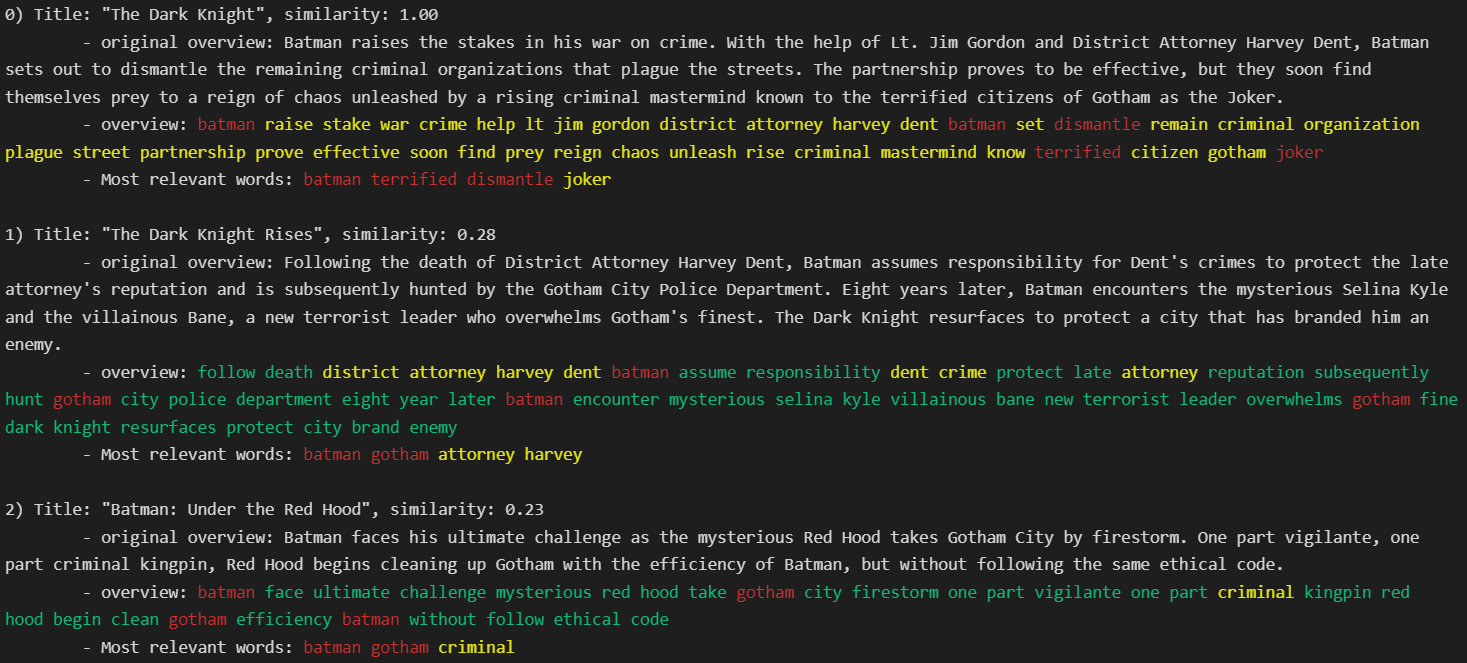)

The following are instead the most similar movies retrieved with our thresholded model. The words `batman` and `gotham` are out of the vocabulary.

In [28]:
df_most_similar = compute_most_similar_movies_tfidf(movie_title='The Dark Knight', df=df, text_col='overview', tfidf=tfidf, 
                                                    show_similar_movies=3, underline_words=True, show_most_relevant_words=4, 
                                                    voc=voc)

Most similar films to "The Dark Knight"

0) Title: "The Dark Knight", similarity: 1.00
	- original overview: Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.
	- overview: batman raise stake war crime help lt jim gordon district attorney harvey dent batman set dismantle remain criminal organization plague street partnership prove effective soon find prey reign chaos unleash rise criminal mastermind know terrified citizen gotham joker 
	- Most relevant words: criminal remain raise prove 

1) Title: "This Must Be the Place", similarity: 0.37
	- original overview: A bored, retired rock star sets out to find his father's executioner, an ex-Nazi war 

## LSA
Now, the Latent Semantic Analysis (LSA) is performed.

Singual Values Decomposition (SVD): $$tfidf = u * D(s) * v^h$$

Let $d = min\{n_{terms},n_{movies}\}$.
- $u$ is a matrix $n_{terms} \times d$. The rows correspond to the terms: each row vector is the vectorial representation of the corresponding term.
- $s$ is a vector with length $d$, containing the singular values, sorted in descending order.
- $D(s)$ represents the diagonal matrix containing the singular values.
- $v^h$ is a matrix $d \times n_{movies}$. The columns correspond to the movies: each column vector is the vectorial representation of the corresponding movie.

In [29]:
u, s, vh = np.linalg.svd(tfidf, full_matrices=False)

In [30]:
u.shape

(607, 607)

In [31]:
s.shape

(607,)

In [32]:
vh.shape

(607, 7376)

Let's now briefly analysis the singular values.

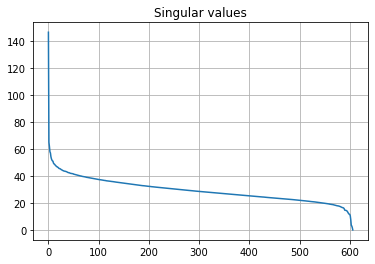

In [33]:
import matplotlib.pyplot as plt 
plt.plot(s)
plt.grid()
plt.title('Singular values');

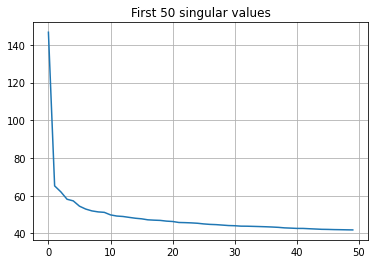

In [34]:
plt.plot(s[:50])
plt.grid()
plt.title('First 50 singular values');

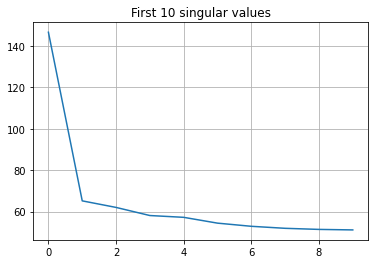

In [35]:
plt.plot(s[:10])
plt.grid()
plt.title('First 10 singular values');

Let's also visualize the curvature function

In [36]:
def diff_function(x):
    return x[1:] - x[:-1]

def curvature_function(s):
    s_diff = diff_function(diff_function(s))
    return s_diff/((1+np.square(s_diff))**1.5)

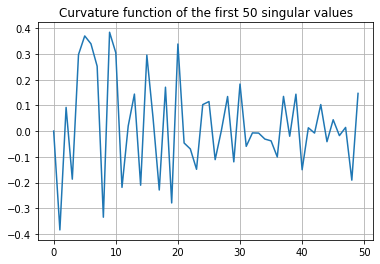

In [37]:
plt.plot(curvature_function(s)[:50])
plt.grid()
plt.title('Curvature function of the first 50 singular values');

## Semantic Similarity

Now the similarity between movies is computed, exploiting the svd. Thanks to the $k$-rank approximation, the semantic of the overviews emerge: in this way, we are able to somehow capture the meaning of the overviews, computing a more interesting and reliable similarity measure. 

Now, some examples showing the most similar movies of certain given movies of interest are shown. In these examples, some interesting properties of this semantic similarity are described, showing also the the differences with the syntactic similarity. 

In [38]:
from utils.similarities import compute_most_similar_movies_lsa
help(compute_most_similar_movies_lsa)

Help on function compute_most_similar_movies_lsa in module utils.similarities:

compute_most_similar_movies_lsa(movie_title: str, df: pandas.core.frame.DataFrame, text_col: str, vh: numpy.ndarray, s: numpy.ndarray, k: int, show_similar_movies: int = None, underline_words: bool = False, show_most_relevant_words: int = None, u: numpy.ndarray = None, voc: numpy.ndarray = None, print_legend: bool = False)
    Compute the most similar movies to the one given in input, according to latent semantic analysis (LSA).
    
    It returns a data structure containing such movies. In addition, an intuitive and easy visualization of these most 
    similar movies is given.
    
    Regarding the visualization, the `show_similar_movies` most similar movies are shown.
    For each one of them, the following information is shown.
    1. Title of the movie.
    2. Similarity score (computed as cosine similarity)
    3. Original overview (i.e. not preprocessed)
    4. Preprocessed overview. Optionally, ea

### Taking into account the semantic
The following example is about the film `Avatar`. 

In [39]:
# SYNTACTIC SIMILARITY
df_most_similar = compute_most_similar_movies_tfidf(movie_title='Avatar', df=df, text_col='overview', tfidf=tfidf, 
                                                    show_similar_movies=5, underline_words=True, show_most_relevant_words=4, 
                                                    voc=voc)

Most similar films to "Avatar"

0) Title: "Avatar", similarity: 1.00
	- original overview: In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
	- overview: nd century paraplegic marine dispatch moon pandora unique mission become torn follow order protect alien civilization 
	- Most relevant words: alien century protect mission 

1) Title: "Beowulf", similarity: 0.43
	- original overview: 6th-century Scandinavian warrior, Beowulf embarks on a mission to slay the manlike ogre Grendel, a descendant of Cain.
	- overview: th century scandinavian warrior beowulf embarks mission slay manlike ogre grendel descendant cain 
	- Most relevant words: century mission 

2) Title: "The Twilight Saga: Breaking Dawn - Part 2", similarity: 0.39
	- original overview: After the birth of Renesmee, the Cullens gather other vampire clans in order to protect the child from a false allegat

In [40]:
# SEMANTIC SIMILARITY, k=50
df_most_similar = compute_most_similar_movies_lsa(movie_title='Avatar', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=50, show_similar_movies=5, underline_words=True, 
                                                  show_most_relevant_words=5, u=u, voc=voc)

Most similar films to "Avatar"

0) Title: "Avatar", similarity: 1.00
	- original overview: In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
	- overview: nd century paraplegic marine dispatch moon pandora unique mission become torn follow order protect alien civilization 
	- Most relevant words: earth planet alien follow crew 

1) Title: "Star Trek: Insurrection", similarity: 0.73
	- original overview: When an alien race and factions within Starfleet attempt to take over a planet that has "regenerative" properties, it falls upon Captain Picard and the crew of the Enterprise to defend the planet's people as well as the very ideals upon which the Federation itself was founded.
	- overview: alien race faction within starfleet attempt take planet regenerative property fall upon captain picard crew enterprise defend planet people well ideal upon federation found 
	- 

The syntactic model consider words like `century` and `mission` the most important words of `Avatar`: indeed, the most similar films are films containing these words. These are words which do not represent much this film. Instead, the most important words for the semantic model are words like `earth` and `planet`, which represent much more correctly the meaning of the film. It is very important to point out that these words are not present in the overview: even if they are not present, the semantic model thinks that these words are the best ones in characterizing the movie. The model has been able to understand that the main theme of the movie is about somehow space and planets (i.e. Science Fiction).

So, it is clear that, in this example, the semantic model has been much more effective in recognizing the similarity with the movie `Avatar`. 

It is also importance to notice that, differently from the syntactic model, with the semantic model most of the words have an impact with the similarity score, even if not present in the text. We have abandoned the simple model in which only the occurance of the precise word matter: now also the semantic and the relation between words is taken into account. This implies that it is very difficult that a word has no impact at all in the similarity score. 

Let's see now another example: movie `The Intouchables`.

In [41]:
# SYNTACTIC SIMILARITY
df_most_similar = compute_most_similar_movies_tfidf(movie_title='The Intouchables', df=df, text_col='overview', tfidf=tfidf, 
                                            show_similar_movies=3, underline_words=True, show_most_relevant_words=4, voc=voc)

Most similar films to "The Intouchables"

0) Title: "The Intouchables", similarity: 1.00
	- original overview: A true story of two men who should never have met – a quadriplegic aristocrat who was injured in a paragliding accident and a young man from the projects.
	- overview: true story two men never meet quadriplegic aristocrat injure paragliding accident young man project 
	- Most relevant words: never accident true meet 

1) Title: "The Hijack That Went South", similarity: 0.49
	- original overview: Aarno Lamminparras hijacked an airplane with a gun in 1978. A true story.
	- overview: aarno lamminparras hijack airplane gun true story 
	- Most relevant words: true story 

2) Title: "The Wrong Man", similarity: 0.37
	- original overview: True story of an innocent man mistaken for a criminal.
	- overview: true story innocent man mistake criminal 
	- Most relevant words: true story man 



In [42]:
# SEMANTIC SIMILARITY, k=50
df_most_similar = compute_most_similar_movies_lsa(movie_title='The Intouchables', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=50, show_similar_movies=3, underline_words=True, u=u, voc=voc, 
                                                  show_most_relevant_words=5)

Most similar films to "The Intouchables"

0) Title: "The Intouchables", similarity: 1.00
	- original overview: A true story of two men who should never have met – a quadriplegic aristocrat who was injured in a paragliding accident and a young man from the projects.
	- overview: true story two men never meet quadriplegic aristocrat injure paragliding accident young man project 
	- Most relevant words: story two true meet young 

1) Title: "War Dogs", similarity: 0.82
	- original overview: Based on the true story of two young men, David Packouz and Efraim Diveroli, who won a $300 million contract from the Pentagon to arm America's allies in Afghanistan.
	- overview: base true story two young men david packouz efraim diveroli million contract pentagon arm america ally afghanistan 
	- Most relevant words: story two true tell base 

2) Title: "Fried Green Tomatoes", similarity: 0.79
	- original overview: Amidst her own personality crisis, southern housewife Evelyn Couch meets Ninny, an outg

Also in this case, the semantic similarity is more effective. The syntatic model is strongly affected simply by the words `true` and `story`. Instead, the semantic model is able to capture also another important word of the plot: `two`. In addition, in the film `Fried Green Tomatoes`, the word `woman` has an high impact in the similarity, even if not present in `The Intouchables`: this word is correctly important in the similarity because it is related with `men` (the plot is about two people creating a strong bond, it does not matter whether they are male or female).  

### Tuning the approximation level `k`
The value of `k` plays a central role in the goodness of the result. It represents our approximation level, namely the number of dimensions onto which we want to squeeze our vectors.
- The bigger `k`, the more we become similar to the syntactic model. We consider more and more details.
- The smaller `k`, the more we approximate our representation. We try to extract the high-level semantic. We try to represent the meaning of the text with common general words, even if not present in the text, giving less importance to specific and detailed words present in the text. Basically, we want to extract the gist, the genre of the movie, describing it with common clear words. 

As the following example show us, if $k$ is too low, some problems can emerge.
- We can have an over-approximation. Like for `Avatar` with $k=5$, in which only thw word `world` remains as the most representative word.
- We can have that wrong words pop out. Wrong general words, not present in the overview, are put as important, like the word `film` for `The Intouchables` with $k=5$ (it has been captured from `story`).

In [92]:
# @title Avatar: tuning k { run: "auto" }

k = "5" #@param [5, 50, 500]
k = int(k)
# SEMANTIC SIMILARITY, DIFFERENT k AMONG [5, 50, 500]
df_most_similar = compute_most_similar_movies_lsa(movie_title='Avatar', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=k, show_similar_movies=3, underline_words=True, u=u, voc=voc, 
                                                  show_most_relevant_words=5)

Most similar films to "Avatar"

0) Title: "Avatar", similarity: 1.00
	- original overview: In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
	- overview: nd century paraplegic marine dispatch moon pandora unique mission become torn follow order protect alien civilization 
	- Most relevant words: world earth battle force must 

1) Title: "White Tiger", similarity: 1.00
	- original overview: Great Patriotic War, early 1940s. After barely surviving a battle with a mysterious, ghostly-white Tiger tank, Red Army Sergeant Ivan Naydenov becomes obsessed with its destruction.
	- overview: great patriotic war early barely survive battle mysterious ghostly white tiger tank red army sergeant ivan naydenov becomes obsess destruction 
	- Most relevant words: world earth battle force must 

2) Title: "The Darkest Hour", similarity: 1.00
	- original overview: In Moscow, five y

In [94]:
# @title The Intouchables: tuning k { run: 'auto' }

k = "5" #@param ["5", "50", "500"]
k = int(k)

# SEMANTIC SIMILARITY, DIFFERENT k AMONG [5, 50, 500]
df_most_similar = compute_most_similar_movies_lsa(movie_title='The Intouchables', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=k, show_similar_movies=3, underline_words=True, u=u, voc=voc, 
                                                  show_most_relevant_words=5)

Most similar films to "The Intouchables"

0) Title: "The Intouchables", similarity: 1.00
	- original overview: A true story of two men who should never have met – a quadriplegic aristocrat who was injured in a paragliding accident and a young man from the projects.
	- overview: true story two men never meet quadriplegic aristocrat injure paragliding accident young man project 
	- Most relevant words: film story love life family 

1) Title: "Closer", similarity: 0.99
	- original overview: A witty, romantic, and very dangerous love story about chance meetings, instant attractions, and casual betrayals. Two couples disintegrate when they begin destructive adulterous affairs with each other.
	- overview: witty romantic dangerous love story chance meeting instant attraction casual betrayal two couple disintegrate begin destructive adulterous affair 
	- Most relevant words: film story love life family 

2) Title: "Laurence Anyways", similarity: 0.99
	- original overview: Set in the 1980s and

### Other examples of the goodness of the semantic model
Let's see other examples in which the semantic similarities are much better than the syntactic ones.

Movie `Interstellar`. In this example, the syntactic model gives high importances to a lot of words, even if they poorly characterize the semantic of the movie: this has an impact on the movies selected as the most similar. Instead, the semantic model is able to focus more on the words which are truly representative. In particular, the model is able to retrieve the words which represent the words and its gist, even if these words are not present in the overview: like words `earth`, `planet`, `find`.

In [45]:
# SYNTACTIC SIMILARITY
df_most_similar = compute_most_similar_movies_tfidf(movie_title='Interstellar', df=df, text_col='overview', tfidf=tfidf, 
                                            show_similar_movies=3, underline_words=True, voc=voc, show_most_relevant_words=4)

Most similar films to "Interstellar"

0) Title: "Interstellar", similarity: 1.00
	- original overview: Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.
	- overview: interstellar chronicle adventure group explorer make use newly discover wormhole surpass limitation human space travel conquer vast distance involve interstellar voyage 
	- Most relevant words: space involve adventure travel 

1) Title: "Police Academy 5: Assignment Miami Beach", similarity: 0.36
	- original overview: The Police Academy misfits travel to Miami, Florida for their academy's commanding officer, Lassard, to receive a prestigious lifetime award pending his retirement, which takes a turn involving a group of jewel thieves after their stolen loot that Lassard unknowingly has in his possession.
	- overview: police academy misfit travel miami fl

In [46]:
# SEMANTIC SIMILARITY, k=20
df_most_similar = compute_most_similar_movies_lsa(movie_title='Interstellar', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=20, show_similar_movies=3, underline_words=True, u=u, voc=voc, 
                                                  show_most_relevant_words=5)

Most similar films to "Interstellar"

0) Title: "Interstellar", similarity: 1.00
	- original overview: Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.
	- overview: interstellar chronicle adventure group explorer make use newly discover wormhole surpass limitation human space travel conquer vast distance involve interstellar voyage 
	- Most relevant words: earth planet alien find film 

1) Title: "Star Trek IV: The Voyage Home", similarity: 0.94
	- original overview: Fugitives of the Federation for their daring rescue of Spock from the doomed Genesis Planet, Admiral Kirk (William Shatner) and his crew begin their journey home to face justice for their actions. But as they near Earth, they find it at the mercy of a mysterious alien presence whose signals are slowly destroying the planet. In a desperate attempt to an

This example about `Interstellar` is interesting also because a slight increase in the approximation level changes dramatically the goodness of the results. Indeed, from $k=50$ up, the model is not able anymore to retrieve the general words `planet`, `earth` and `find` as the most important words, but instead it simply assigns an high importance to `group`, which is contained in the overview.

In [47]:
# SEMANTIC SIMILARITY, k=50
df_most_similar = compute_most_similar_movies_lsa(movie_title='Interstellar', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=50, show_similar_movies=2, underline_words=True, u=u, voc=voc, 
                                                  show_most_relevant_words=5)

Most similar films to "Interstellar"

0) Title: "Interstellar", similarity: 1.00
	- original overview: Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.
	- overview: interstellar chronicle adventure group explorer make use newly discover wormhole surpass limitation human space travel conquer vast distance involve interstellar voyage 
	- Most relevant words: group make earth travel planet 

1) Title: "Once Upon a Time in Anatolia", similarity: 0.67
	- original overview: A group of men set out in search of a dead body in the Anatolian steppes.
	- overview: group men set search dead body anatolian steppe 
	- Most relevant words: group make set follow soon 



Movie `Star Wars: Episode III - Revenge of the Sith`. Also in this example, the syntactic model gives high importances to a lot of words, even if they poorly characterize the semantic of the movie. The semantic model instead is able to focus more on the words which are truly important, like `become`, `force`, `evil`. This is interesting, also because `become` is a quite common word (its documents frequency is high), thus the tf-idf model has penalized that word, while the semantic model is able to correctly understand its importance.

In [48]:
# SYNTACTIC SIMILARITY
df_most_similar = compute_most_similar_movies_tfidf(movie_title='Star Wars: Episode III - Revenge of the Sith', 
                                            df=df, text_col='overview', tfidf=tfidf, show_similar_movies=3, 
                                            underline_words=True, voc=voc, show_most_relevant_words=4)

Most similar films to "Star Wars: Episode III - Revenge of the Sith"

0) Title: "Star Wars: Episode III - Revenge of the Sith", similarity: 1.00
	- original overview: Years after the onset of the Clone Wars, the noble Jedi Knights lead a massive clone army into a galaxy-wide battle against the Separatists. When the sinister Sith unveil a thousand-year-old plot to rule the galaxy, the Republic crumbles and from its ashes rises the evil Galactic Empire. Jedi hero Anakin Skywalker is seduced by the dark side of the Force to become the Emperor's new apprentice ‚Äì Darth Vader. The Jedi are decimated, as Obi-Wan Kenobi and Jedi Master Yoda are forced into hiding. The only hope for the galaxy are Anakin's own offspring ‚Äì the twin children born in secrecy who will grow up to become heroes.
	- overview: year onset clone war noble jedi knight lead massive clone army galaxy wide battle separatist sinister sith unveil thousand year old plot rule galaxy republic crumbles ash rise evil galactic e

In [49]:
# SEMANTIC SIMILARITY, k=50
df_most_similar = compute_most_similar_movies_lsa(movie_title='Star Wars: Episode III - Revenge of the Sith', df=df, 
                                                  text_col='overview', vh=vh, s=s, k=50, show_similar_movies=3, 
                                                  underline_words=True, u=u, voc=voc, show_most_relevant_words=5)

Most similar films to "Star Wars: Episode III - Revenge of the Sith"

0) Title: "Star Wars: Episode III - Revenge of the Sith", similarity: 1.00
	- original overview: Years after the onset of the Clone Wars, the noble Jedi Knights lead a massive clone army into a galaxy-wide battle against the Separatists. When the sinister Sith unveil a thousand-year-old plot to rule the galaxy, the Republic crumbles and from its ashes rises the evil Galactic Empire. Jedi hero Anakin Skywalker is seduced by the dark side of the Force to become the Emperor's new apprentice ‚Äì Darth Vader. The Jedi are decimated, as Obi-Wan Kenobi and Jedi Master Yoda are forced into hiding. The only hope for the galaxy are Anakin's own offspring ‚Äì the twin children born in secrecy who will grow up to become heroes.
	- overview: year onset clone war noble jedi knight lead massive clone army galaxy wide battle separatist sinister sith unveil thousand year old plot rule galaxy republic crumbles ash rise evil galactic e

### A limitation of the semantic model: loss of the details
We have said that the bigger $k$, the more the details and the rare/specific words are important. While the smaller $k$, the higher is the level of simplification, giving more importance to meaningful common words, representing the genre7gist of that movie.

However, this kind of simplification is not always a good thing. There are certain movies for which those specific used words are essential for representing the meaning: losing those words means representing in a worse way the semantic of the movie. So, in such cases, our approximated semantic model is worse than a syntactic one: for reaching good results, we have to use an high $k$.

This can be seen in the following examples. Each of the following movies has some specific important words: for `Memento` there is `memory`; for `Fight Club` there are `shock` and `club`. The importance of these words is lost in the svd approximation (unless a very big $k$ is used, like $k=500$), and instead some more general common words pop out, which are less important (or totally wrong) for representing that movie. For `Memento`, the word `wife` pops out as the most important word; while for `Fight Club`, the words `time` and `town` pop out.

`Memento`

In [50]:
# SYNTACTIC SIMILARITY
df_most_similar = compute_most_similar_movies_tfidf(movie_title='Memento', df=df, text_col='overview', tfidf=tfidf, 
                                            show_similar_movies=3, underline_words=True, voc=voc, show_most_relevant_words=4)

Most similar films to "Memento"

0) Title: "Memento", similarity: 1.00
	- original overview: Suffering short-term memory loss after a head injury, Leonard Shelby embarks on a grim quest to find the lowlife who murdered his wife in this gritty, complex thriller that packs more knots than a hangman's noose. To carry out his plan, Shelby snaps Polaroids of people and places, jotting down contextual notes on the backs of photos to aid in his search and jog his memory. He even tattoos his own body in a desperate bid to remember.
	- overview: suffer short term memory loss head injury leonard shelby embark grim quest find lowlife murder wife gritty complex thriller pack knot hangman noose carry plan shelby snaps polaroid people place jot contextual note back photo aid search jog memory even tattoo body desperate bid remember 
	- Most relevant words: memory suffer embark desperate 

1) Title: "Ghajini", similarity: 0.41
	- original overview: Sanjay a rich tycoon suffering from short term memor

In [51]:
# SEMANTIC SIMILARITY, k=50
df_most_similar = compute_most_similar_movies_lsa(movie_title='Memento', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=50, show_similar_movies=3, underline_words=True, u=u, voc=voc, 
                                                  show_most_relevant_words=5)

Most similar films to "Memento"

0) Title: "Memento", similarity: 1.00
	- original overview: Suffering short-term memory loss after a head injury, Leonard Shelby embarks on a grim quest to find the lowlife who murdered his wife in this gritty, complex thriller that packs more knots than a hangman's noose. To carry out his plan, Shelby snaps Polaroids of people and places, jotting down contextual notes on the backs of photos to aid in his search and jog his memory. He even tattoos his own body in a desperate bid to remember.
	- overview: suffer short term memory loss head injury leonard shelby embark grim quest find lowlife murder wife gritty complex thriller pack knot hangman noose carry plan shelby snaps polaroid people place jot contextual note back photo aid search jog memory even tattoo body desperate bid remember 
	- Most relevant words: wife find murder people take 

1) Title: "The Two Faces of January", similarity: 0.71
	- original overview: A thriller centered on a con artist, 

`Fight Club`

In [52]:
# SYNTACTIC SIMILARITY
df_most_similar = compute_most_similar_movies_tfidf(movie_title='Fight Club', df=df, text_col='overview', tfidf=tfidf, 
                                            show_similar_movies=3, underline_words=True, voc=voc, show_most_relevant_words=4)

Most similar films to "Fight Club"

0) Title: "Fight Club", similarity: 1.00
	- original overview: A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.
	- overview: tick time bomb insomniac slippery soap salesman channel primal male aggression shock new form therapy concept catch underground fight club form every town eccentric get way ignites control spiral toward oblivion 
	- Most relevant words: shock club catch form 

1) Title: "Best of the Best 2", similarity: 0.29
	- original overview: In an underground fight club, blackbelt Travis Brickley is killed after losing to the evil martial arts master Brakus. Travis' death is witnessed by Walter Grady, the son of his best friend Alex Grady. Alex and his partner, Tommy Lee, vow to avenge their frien

In [53]:
# SEMANTIC SIMILARITY, k=50
df_most_similar = compute_most_similar_movies_lsa(movie_title='Fight Club', df=df, text_col='overview', vh=vh, 
                                                  s=s, k=50, show_similar_movies=3, underline_words=True, u=u, voc=voc, 
                                                  show_most_relevant_words=5)

Most similar films to "Fight Club"

0) Title: "Fight Club", similarity: 1.00
	- original overview: A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.
	- overview: tick time bomb insomniac slippery soap salesman channel primal male aggression shock new form therapy concept catch underground fight club form every town eccentric get way ignites control spiral toward oblivion 
	- Most relevant words: town time small new get 

1) Title: "Lock, Stock and Two Smoking Barrels", similarity: 0.69
	- original overview: A card sharp and his unwillingly-enlisted friends need to make a lot of cash quick after losing a sketchy poker match. To do this they decide to pull a heist on a small-time gang who happen to be operating out of the flat next door.
	- overv

## Preprocessing genres
Now the column `genres` is processed, in orther to contain, for each movie, the set of genres to which it belongs. 

In [54]:
from utils.preprocessing import preprocess_genres

df = preprocess_genres(df, genres_col='genres')

In [55]:
df['genres'].head()

0                            {Comedy}
1    {Comedy, Romance, Drama, Family}
2                             {Drama}
3                   {Thriller, Drama}
4                  {Action, Thriller}
Name: genres, dtype: object

Let's visualize the set of all possible genres.

In [56]:
genres = set([])
df['genres'].map(lambda genres_set: genres.update(genres_set))
print(genres)

{'War', 'Romance', 'Family', 'Action', 'Music', 'Fantasy', 'Horror', 'Adventure', 'Animation', 'Thriller', 'Mystery', 'History', 'Drama', 'TV Movie', 'Comedy', 'Crime', 'Foreign', 'Documentary', 'Science Fiction', 'Western'}


## Visualization 
In this section, the movies vectors and the words vectors are plotted onto two LSA dimensions, mainly the first two.

### Visualization of the movies vectors

In [57]:
# For more details, here there is the docstring of the function
from utils.visualization import plot_movies
help(plot_movies)

Help on function plot_movies in module utils.visualization:

plot_movies(vh: numpy.ndarray, s: numpy.ndarray, dimensions: Tuple[int] = (0, 1), labels: Iterable[str] = None, subset: numpy.ndarray = None, normalize: bool = False, k: int = 100)
    Plot the movies onto the two specified dimensions of the LSA space.
    
    The given movies are encoded as column vectors in the matrix `vh`. Optionally, we can consider only some of the movies, 
    and not all of them (we can consider only a subset of the columns in `vh`).
    
    This function can be used both in the content-based and collaborative contexts. 
    
    Parameters
    ----------
    vh : np.ndarray
        Bidimensional array, obtained from the SVD.
        It's the SVD matrix related to the movies. It has dimensions (d,n_movies), where d=min{n_words,n_movies}. So, the 
        columns correspond to the movies.
    s : np.ndarray
        Monodimensional array, containing the singular values, sorted in descending order.
    

Plot of all movies along the first two LSA dimensions.

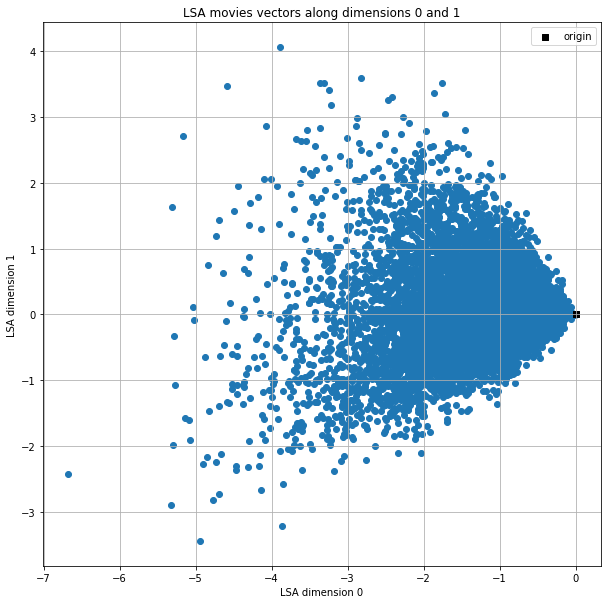

In [58]:
plot_movies(vh, s, dimensions=(0,1))

Plot of the normalized movies vectors, using $k=100$. 

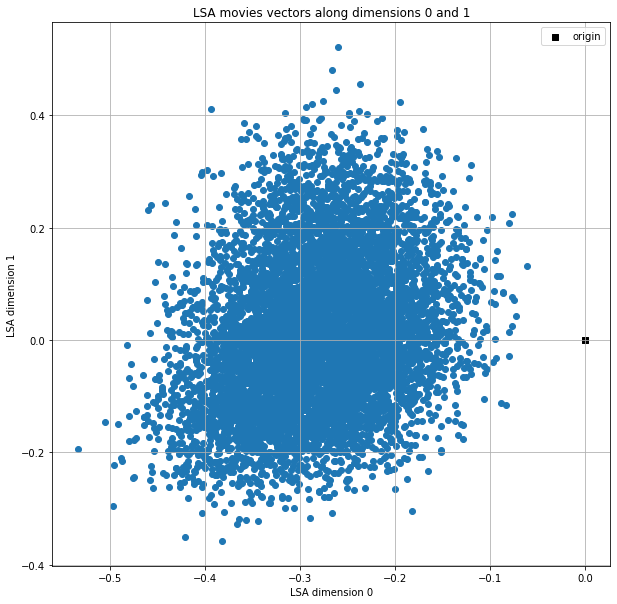

In [59]:
k_slider = plot_movies(vh, s, dimensions=(0,1), normalize=True, k=100)

Tuning the approximation level $k$ in the normalized plot.

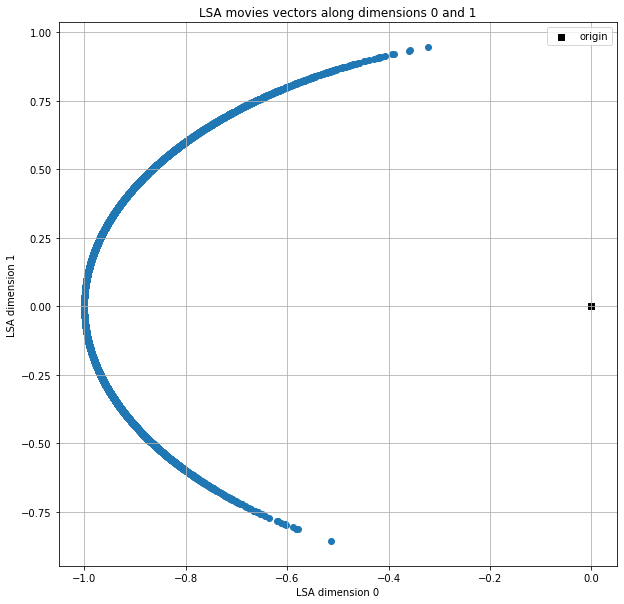

In [96]:
# @title Normalized plot: tuning k { run: "auto" }

k = 2  # @param {type:"slider", min:2, max:100, step:1}
plot_movies(vh, s, dimensions=(0,1), normalize=True, k=k)

Plot along the second and third LSA dimensions. 

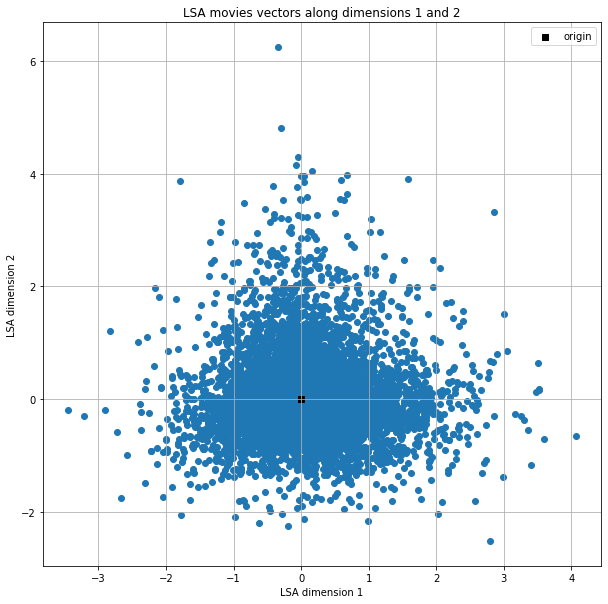

In [61]:
plot_movies(vh, s, dimensions=(1,2))

Plot of some specific movies of interest, along the first two LSA dimensions.

In [62]:
movies_of_interest = ['Just Married', 'Friends with Benefits', 'Meet the Fockers', 'Daddy\'s Home', 'The Dark Knight Rises', 
                    'Shutter Island', 'Kill Bill: Vol. 1', 'Interstellar']
movies_subset = []
for movie_of_interest in movies_of_interest:
    movies_subset += list(df[df['title'].map(lambda t: movie_of_interest==str(t))].index)

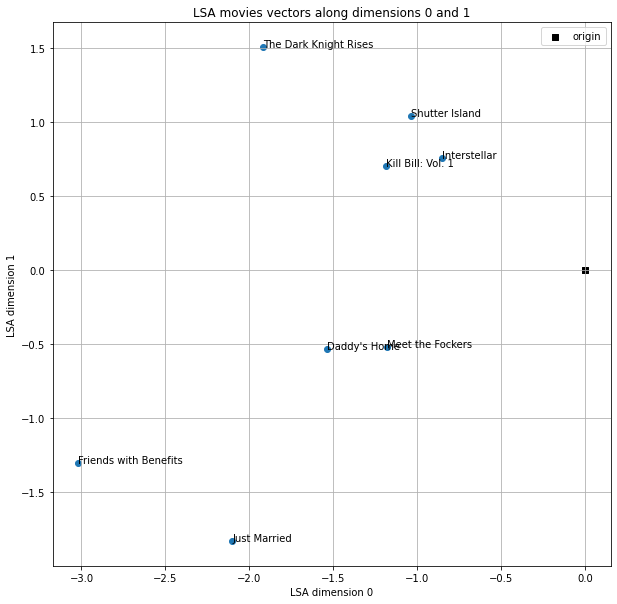

In [63]:
plot_movies(vh, s, dimensions=(0,1), labels=df['title'].to_numpy(), subset=movies_subset)

As it can be seen, the films vectors are splitted in two groups (with respect to the cosine similarity, i.e. w.r.t. the angle with the origin).
- The up group contains the films `The Dark Knight Rises`, `Shutter Island`, `Kill Bill: Vol. 1`, `Interstellar`, which are all films with a 'dark' semantic (e.g. Thriller or Science Fiction or Horror). 
- The down group contains the films `Just Married`, `Friends with Benefits`, `Meet the Fockers`, `Daddy\'s Home`, which are all films with a 'bright' semantic (e.g. Comedy or Romance). 

So, it seems that the first two LSA dimensions are able to capture the distionction between 'negative' and 'positive' polarity: the former distributes in the upper-left regione, the latter in the lower-right region.

In the normalized plot, the movies vectors become nearer between each others.

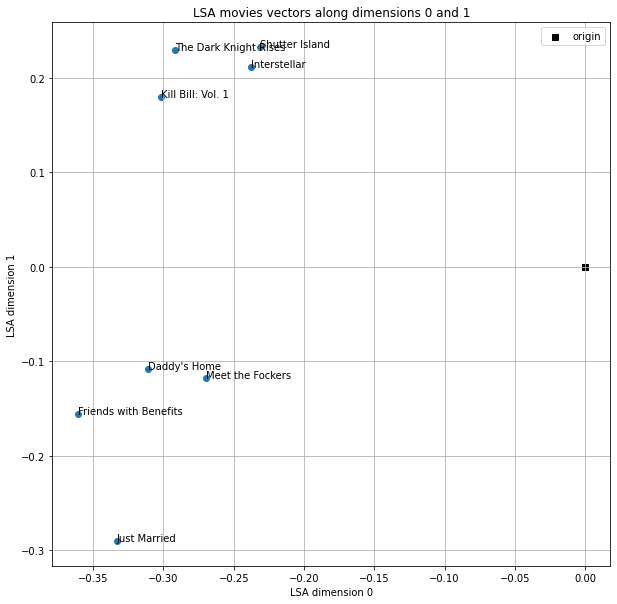

In [64]:
plot_movies(vh, s, dimensions=(0,1), labels=df['title'].to_numpy(), subset=movies_subset, normalize=True)

### Visualization of the words vectors

In [65]:
# For more details, here there is the docstring of the function
from utils.visualization import plot_words
help(plot_words)

Help on function plot_words in module utils.visualization:

plot_words(u: numpy.ndarray, s: numpy.ndarray, dimensions: Tuple[int] = (0, 1), labels: Iterable[int] = None, subset: numpy.ndarray = None, normalize: bool = False, k: int = 100)
    Plot the words onto the two specified dimensions of the LSA space.
    
    The given words are encoded as row vectors in the matrix `u`. Optionally, we can consider only some of the words, 
    and not all of them (we can consider only a subset of the rows in `u`).
    
    Parameters
    ----------
    u : np.ndarray
        Bidimensional array, obtained from the SVD.
        It's the SVD matrix related to the words. It has dimensions (n_words,d), where d=min{n_words,n_movies}. So, the rows
        correspond to the words.
    s : np.ndarray
        Monodimensional array, containing the singular values, sorted in descending order.
    dimensions : Tuple[int], optional
        Two LSA dimensions onto which plot the words vectors, by default (0,1)

Let's plot some words of interest

In [66]:
words_of_interest = ['love', 'marriage', 'parent', 'school', 'dark', 'alien', 'fight', 'criminal']
words_subset = []
for word_of_interest in words_of_interest:
    words_subset += list(np.indices(dimensions=voc.shape)[0][voc==word_of_interest])

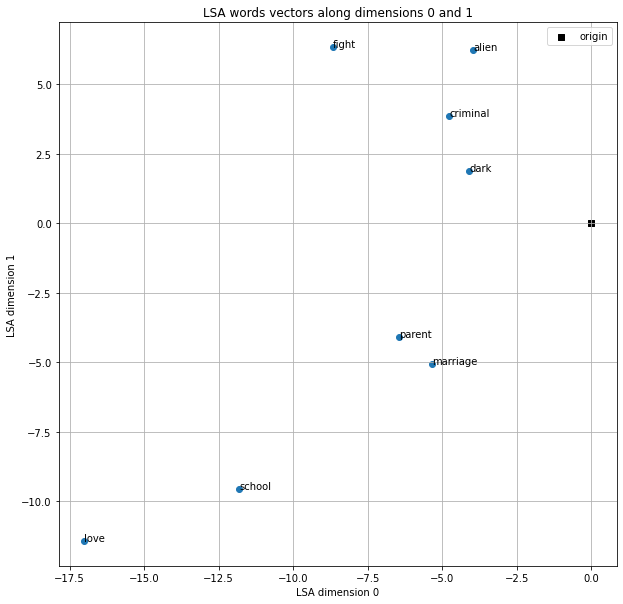

In [67]:
plot_words(u, s, labels=voc, subset=words_subset)

This plot confirms what has been enlighted before, about the distionction between the negative (upper-left region) and positive polarity (lower-left region). This intuition is confirmed even with words, not only movies.

*It is important to remind that for understanding if two vectors are similar we have to see the similarity between their angles, since we are using the cosine similarity.*

In the normalized plot, the words vectors are nearer each others.

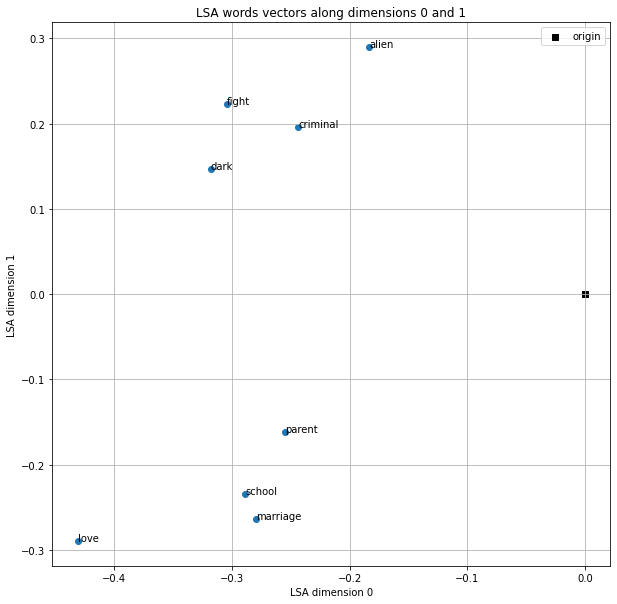

In [68]:
plot_words(u, s, labels=voc, subset=words_subset, normalize=True)

### Genres analysis: polarization between genres
Now we want to plot again the movies vectors, but considering also their genres, in order to perform a genres analysis.

In [69]:
# For more details, here there is the docstring of the function
from utils.visualization import plot_genres_analysis
help(plot_genres_analysis)

Help on function plot_genres_analysis in module utils.visualization:

plot_genres_analysis(vh: numpy.ndarray, s: numpy.ndarray, df: pandas.core.frame.DataFrame, genres: List[str], dimensions: Tuple[int] = (0, 1), words: List[str] = None, plot_most_relevant_words: bool = False, n: int = 1, u: numpy.ndarray = None, voc: numpy.ndarray = None, normalize: bool = False, k: int = 100, delete_intersection: bool = True)
    Make a plot for analyzing the given genres of interest.
    
    Basically, we plot the movies onto the two specified dimensions of the LSA space, coloring the points in different ways 
    according to their genre.
    The given movies are encoded as column vectors in the matrix `vh`. 
    
    Optionally, a list of words to be plotted can be specified. In this way, we can see the relation of these words with the
    genres of interest.
    
    Still optionally, we can ask to plot, for each genre, the `n` most relevant words. Namely, the `n` words which are the 
    most s

First of all, the following is the plot of the movies with genre either `Romance` or `Science Fiction`. This plot confirms again the distinction between negative and positive polarity, captured by the first two LSA dimensions.

We can also observe that `Science Fiction` is more polarized, while `Romance` is a wider and more general set. This could mean that `Science Fiction` is a more specific and particular genre, while `Romance` is more broad and general, which can incorporate also very different movies.

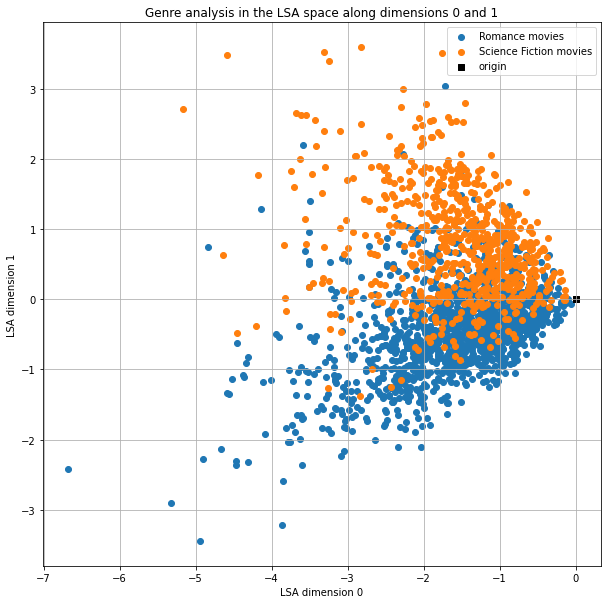

In [70]:
plot_genres_analysis(vh, s, df, genres=['Romance','Science Fiction'])

Now, some interesting words are added into the plot, for visualizing their relation with these genres. As expected: there is a strong cosine correlation between the `Science Fiction` movies and the words `alien` and `space`; and there is a strong correlation between the `Romance` movies and the words `love` and `marriage`. 

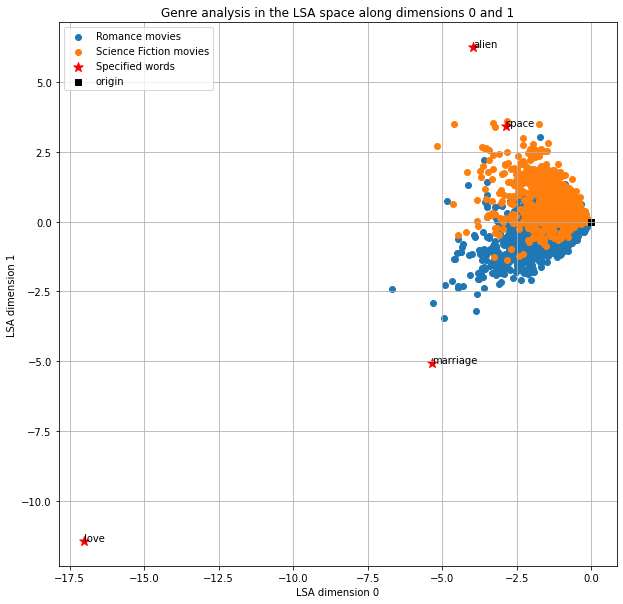

In [71]:
plot_genres_analysis(vh, s, df, genres=['Romance','Science Fiction'], words=['love','marriage','space','alien'], u=u, voc=voc)

The following plot still contains the movies vectors of these two genres. But now also the vectors of the $3$ most correlated words to the genre `Science Fiction` and of the $3$ most correlated words to the genre `Romance` are plotted.

In other words, for each genre, the $3$ words which are the most similar to the movies with that genre are plotted. To be more specific, for each word, its average cosine similarity computed w.r.t. all the movies with that genre is calculated, and then the $3$ words with biggest score are taken. In the plot, also the mean cosine similarity of each of these words is shown.

The results are intuitive and natural.
- For `Science Fiction`, the $3$ most relevant words are `earth`, `planet`, `alien`.
- For `Romance`, the $3$ most relevant words are `love`,`man`,`end`.

We can also observe that the `Science Fiction` words are very specific and particular (and with higher cosine similarity), while the `Romance` words are more general (and with lower cosine similarity). This confirms our intuition of before regarding the fact that `Science Fiction` is a more specific and polarized genre, while `Romance` is broader.

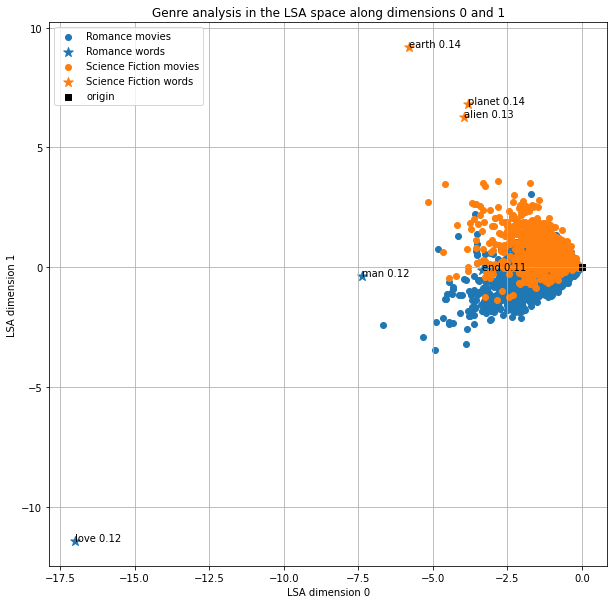

In [72]:
plot_genres_analysis(vh, s, df, genres=['Romance','Science Fiction'], plot_most_relevant_words=True, n=3, u=u, voc=voc)

We can perform this same analysis also in the normalized plot, tuning the $k$ parameter.

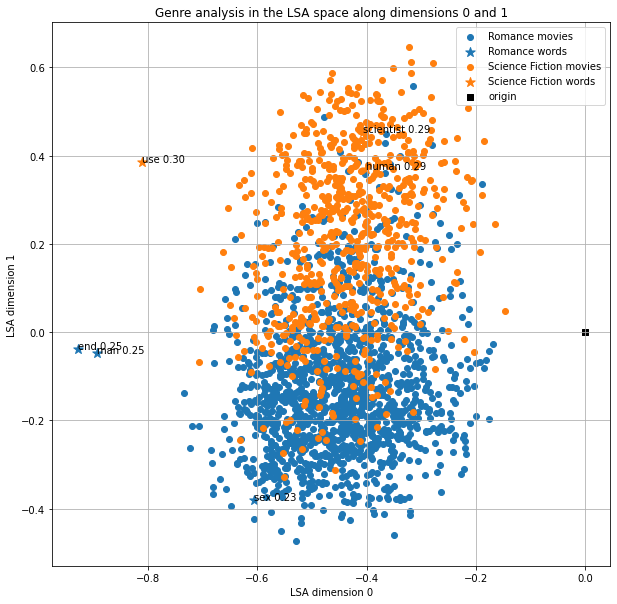

In [73]:
# @title Normalized plot: tuning k { run: "auto" }

k = 31  # @param {type:"slider", min:2, max:100, step:1}
plot_genres_analysis(vh, s, df, genres=['Romance','Science Fiction'], u=u, voc=voc, plot_most_relevant_words=True, n=3,
                     normalize=True, k=k)

This polarization can be seen also between others genres. Let's see some other examples.

Genres `Romance`-`War`. Also here, `War` is very specific (with very specific words), while `Romance` is more general.

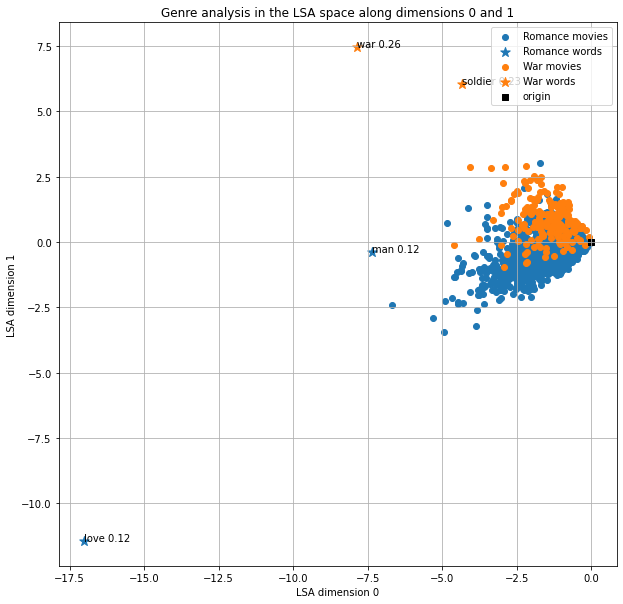

In [74]:
plot_genres_analysis(vh, s, df, genres=['Romance', 'War'], dimensions=(0,1), plot_most_relevant_words=True, n=2, u=u, voc=voc)

Genres `Music`-`War`. Here both genres are very polarized, with very specific words.

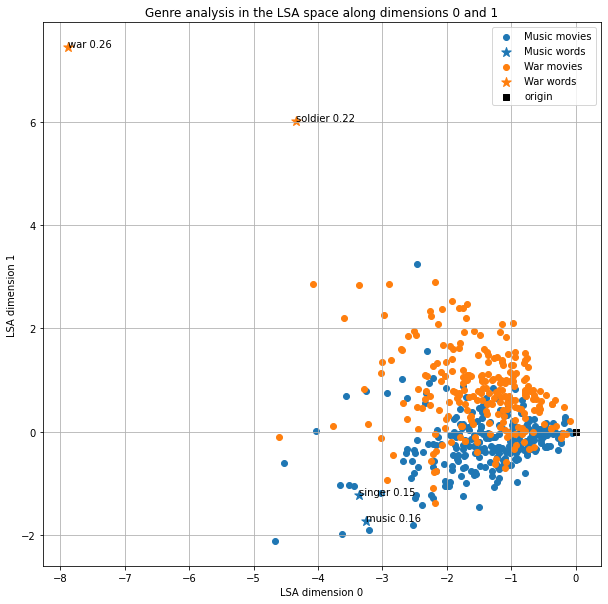

In [75]:
plot_genres_analysis(vh, s, df, genres=['Music', 'War'], dimensions=(0,1), plot_most_relevant_words=True, n=2, u=u, voc=voc)

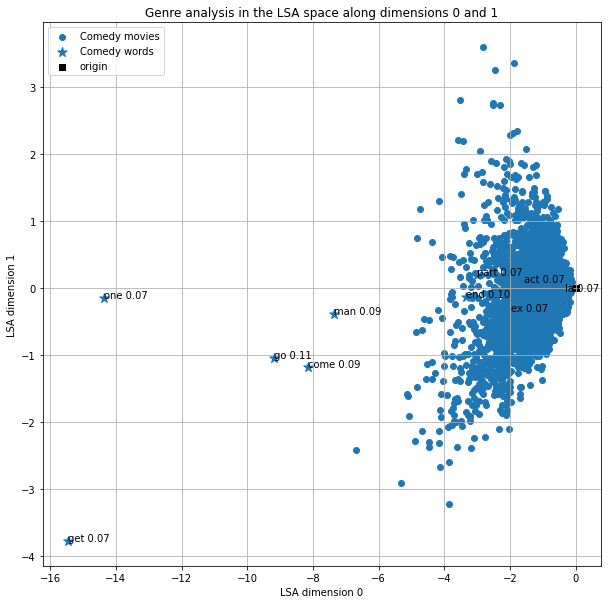

In [76]:
plot_genres_analysis(vh, s, df, genres=['Comedy'], u=u, voc=voc, 
                     plot_most_relevant_words=True, n=10, k=100)

### Genres analysis: most relevant words and movies distribution
To conclude the genres analysis, we want to inspect the most relevant words of different genres, and the distribution of the movies belonging to those genres.

First of all, let's show again the genres `War` and `Music`, which are both highly polarized genres with very specific and particular words, but with opposite polarity.

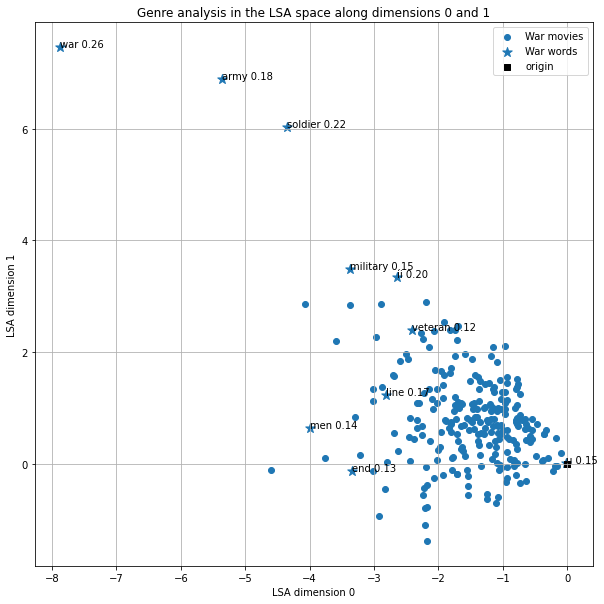

In [77]:
plot_genres_analysis(vh, s, df, genres=['War'], plot_most_relevant_words=True, n=10, k=100, u=u, voc=voc)

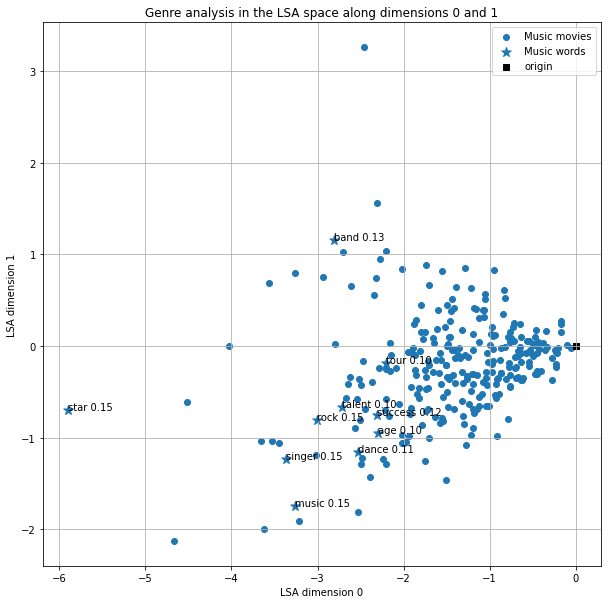

In [78]:
plot_genres_analysis(vh, s, df, genres=['Music'], plot_most_relevant_words=True, n=10, k=100, u=u, voc=voc)

Genre `Documentary`. Even if it does not contain many films, it is a broad set, covering both polarities. This is intuitive and coherent with the meaning of the genre 8this genre is neither positive nor negative). Also the most relevant words are intuitive and coherent with the meaning of that genre.

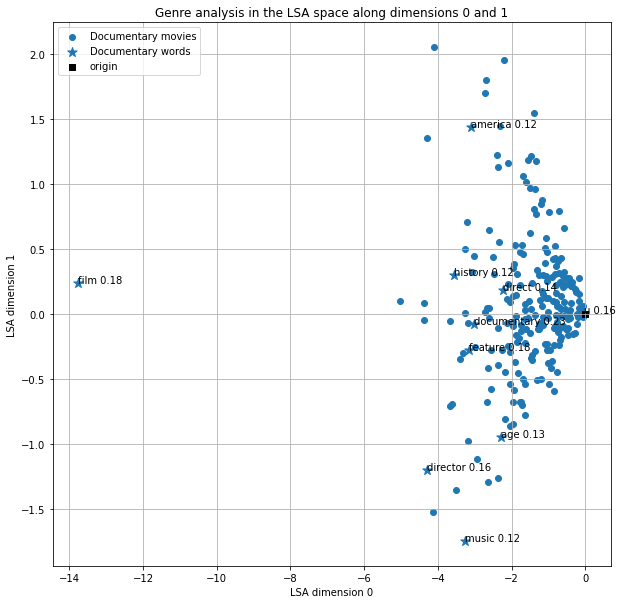

In [79]:
plot_genres_analysis(vh, s, df, genres=['Documentary'], plot_most_relevant_words=True, n=10, k=100, u=u, voc=voc)

Genre `Horror`. Against intuition, this genre is only slightly polarized towards the upper-left region. The most relevant words are coherent with th meaning of the genre. Several words are quite general and they can belong to different genres and polarities: this explains in part why this genre is so broad.

Basically, how much a genre is polarized is deeply related to how much its most relevant words are polarized.

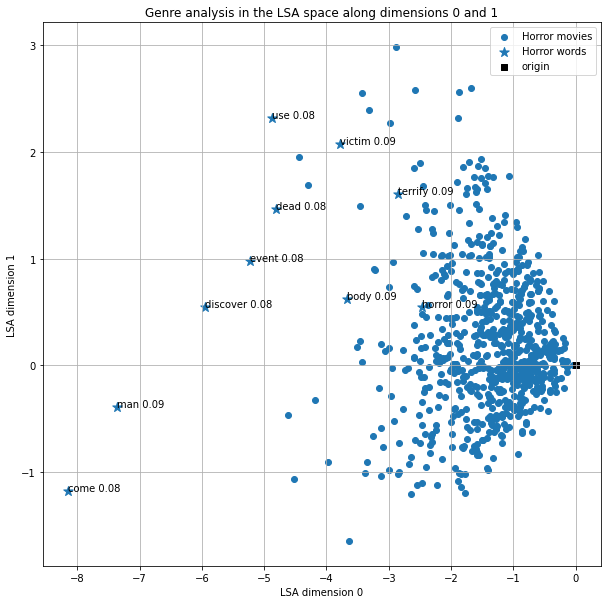

In [80]:
plot_genres_analysis(vh, s, df, genres=['Horror'], plot_most_relevant_words=True, n=10, k=100, u=u, voc=voc)

Genre `Mystery`. It is more polarized than `Horror`. This results is coherent with the fact that the most relevant words are more specific and more polarized themselves. This again shows the relation between the polarity of the genre and the polarity of its most relevant words.

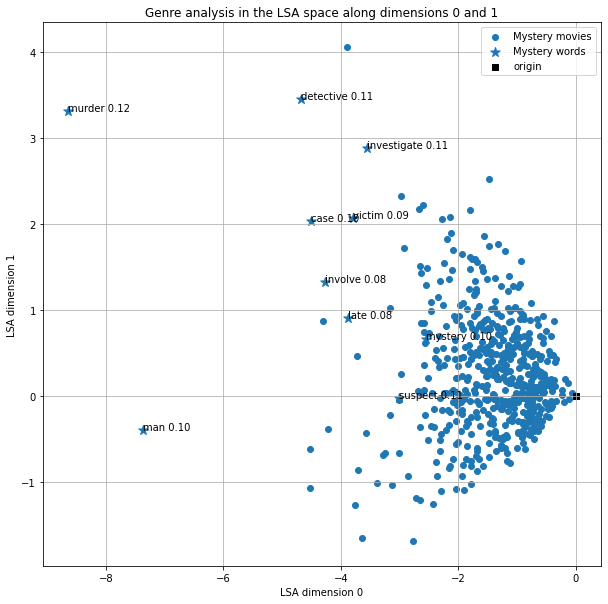

In [81]:
plot_genres_analysis(vh, s, df, genres=['Mystery'], plot_most_relevant_words=True, n=10, k=100, u=u, voc=voc)

Genre `Drama`. It is probably the broadest and most general genre, even if it is slightly polarized towards the lower-left region. Coherently w.r.t. our expectations, the most relevant words are very general and common words. 

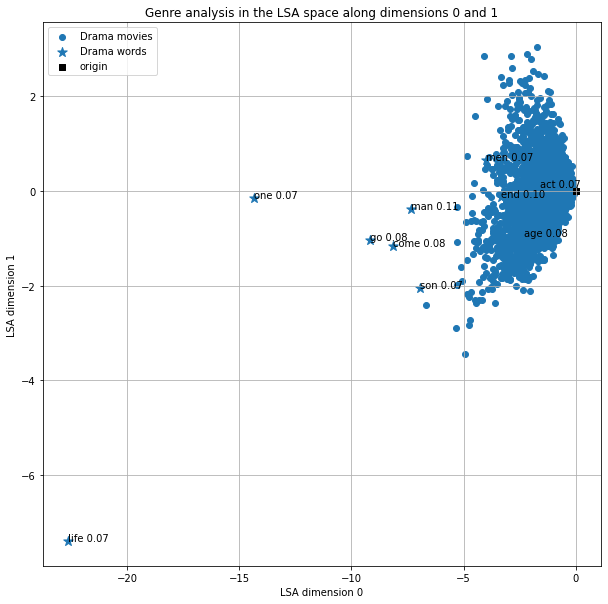

In [82]:
plot_genres_analysis(vh, s, df, genres=['Drama'], plot_most_relevant_words=True, n=10, k=100, u=u, voc=voc)

## Queries
Now, another kind of interesting analysis is carried out. An invented movie overview is given to the model as query, and it returns the most similar movies. We can perform this using either the syntactic model or the semantic one, as seen before.

The interfaces of the functions for computing the most similar movies are very similar to the ones of the functions seen before. For keeping the same interface, the first retrieved most similar movie is always the query itself: as seen before, this entry is useful for visualizing which are the words that the model thinks are the most relevant and representative and that it will search for in the other movies overviews for finding similarities.

In [83]:
from utils.similarities import compute_mostSimilarMovies_tfidf_query

from utils.similarities import compute_mostSimilarMovies_lsa_query

In particular, we perform this analyisis on overviews representing films of certain genres: we first try on a Romance movie overview, and then on a Science Fiction movie overview. 

### Romance query
This overview has been generated using the [GPT playground](https://beta.openai.com/playground), by specifying the prompt "Write the overview of a romance film".

In [84]:
query = '"Love at First Sight" is a romantic comedy about two people who find love in an unexpected place. After a chance encounter at the zoo, Anna and John fall head-over-heels in love. Despite their different backgrounds and beliefs, they discover that they are perfect for each other. With the help of Anna\'s eccentric family and John\'s loyal friends, they must navigate the ups and downs of new love while trying to make it last. Filled with humor and heart, Love at First Sight is a feel-good story about embracing life’s surprises and taking a chance on love.'
query

'"Love at First Sight" is a romantic comedy about two people who find love in an unexpected place. After a chance encounter at the zoo, Anna and John fall head-over-heels in love. Despite their different backgrounds and beliefs, they discover that they are perfect for each other. With the help of Anna\'s eccentric family and John\'s loyal friends, they must navigate the ups and downs of new love while trying to make it last. Filled with humor and heart, Love at First Sight is a feel-good story about embracing life’s surprises and taking a chance on love.'

As it can be seen, the semantic model is more effective also in this case. The syntactic model emphasizes more words like `chance` and `john`, which mislead the search for similarity. For example, the films `The Visual Bible: The Gospel of John` and `Jackie` are pretty unrelated. The semantic model is instead better in emphasizing the actual meaningful words, like `love` and `fall`: in this way, it better captures the semantic of the movie and it is more effective in the similarity search.

In [85]:
df_most_similar = compute_mostSimilarMovies_tfidf_query(query_text=query, df=df, text_col='overview', tfidf=tfidf, voc=voc, 
                                      show_similar_movies=5, underline_words=True, show_most_relevant_words=5)

Most similar films to the given query

0) Title: "query", similarity: 1.00
	- original overview: "Love at First Sight" is a romantic comedy about two people who find love in an unexpected place. After a chance encounter at the zoo, Anna and John fall head-over-heels in love. Despite their different backgrounds and beliefs, they discover that they are perfect for each other. With the help of Anna's eccentric family and John's loyal friends, they must navigate the ups and downs of new love while trying to make it last. Filled with humor and heart, Love at First Sight is a feel-good story about embracing life’s surprises and taking a chance on love.
	- overview: love first sight romantic comedy two people find love unexpected place chance encounter zoo anna john fall head heel love despite different background beliefs discover perfect help anna eccentric family john loyal friend must navigate ups down new love try make last filled humor heart love first sight feel good story embrace life 

In [86]:
df_most_similar = compute_mostSimilarMovies_lsa_query(query_text=query, df=df, text_col='overview', vh=vh, s=s, u=u, k=30, 
                                                      voc=voc, show_similar_movies=5, underline_words=True, 
                                                      show_most_relevant_words=5) 

Most similar films to the given query

0) Title: "query", similarity: 0.90
	- original overview: "Love at First Sight" is a romantic comedy about two people who find love in an unexpected place. After a chance encounter at the zoo, Anna and John fall head-over-heels in love. Despite their different backgrounds and beliefs, they discover that they are perfect for each other. With the help of Anna's eccentric family and John's loyal friends, they must navigate the ups and downs of new love while trying to make it last. Filled with humor and heart, Love at First Sight is a feel-good story about embracing life’s surprises and taking a chance on love.
	- overview: love first sight romantic comedy two people find love unexpected place chance encounter zoo anna john fall head heel love despite different background beliefs discover perfect help anna eccentric family john loyal friend must navigate ups down new love try make last filled humor heart love first sight feel good story embrace life 

### Science fiction query
Also this overview has been generated using the [GPT playground](https://beta.openai.com/playground), by specifying the prompt "Write the overview of a science fiction film".

In [87]:
query = 'In a distant future, a group of brave space explorers set out on a daring mission to save humanity from a mysterious alien race. As they venture into the unknown, they discover a world of advanced technology and mysterious creatures that could be their greatest ally or their worst enemy. With the fate of the human race in their hands, they must battle their way through a never-ending onslaught of enemies and obstacles to ensure the survival of the human race. Along the way, they will uncover secrets of the universe that could change the course of history.'
query

'In a distant future, a group of brave space explorers set out on a daring mission to save humanity from a mysterious alien race. As they venture into the unknown, they discover a world of advanced technology and mysterious creatures that could be their greatest ally or their worst enemy. With the fate of the human race in their hands, they must battle their way through a never-ending onslaught of enemies and obstacles to ensure the survival of the human race. Along the way, they will uncover secrets of the universe that could change the course of history.'

As it can be seen, the semantic model is more effective also in this case. The syntactic model emphasizes more words like `race`, `enemy` and `mysterious`, which mislead the search for similarity. The semantic model is instead better in emphasizing the actual meaningful words, like `world`, `save` and `earth`: in this way, it better captures the semantic of the movie and it is more effective in the similarity search.

In [88]:
df_most_similar = compute_mostSimilarMovies_tfidf_query(query_text=query, df=df, text_col='overview', tfidf=tfidf, voc=voc, 
                                      show_similar_movies=5, underline_words=True, show_most_relevant_words=5)

Most similar films to the given query

0) Title: "query", similarity: 1.00
	- original overview: In a distant future, a group of brave space explorers set out on a daring mission to save humanity from a mysterious alien race. As they venture into the unknown, they discover a world of advanced technology and mysterious creatures that could be their greatest ally or their worst enemy. With the fate of the human race in their hands, they must battle their way through a never-ending onslaught of enemies and obstacles to ensure the survival of the human race. Along the way, they will uncover secrets of the universe that could change the course of history.
	- overview: distant future group brave space explorer set dare mission save humanity mysterious alien race venture unknown discover world advance technology mysterious creature could greatest ally bad enemy fate human race hand must battle way never end onslaught enemy obstacles ensure survival human race along way uncover secret universe

In [89]:
df_most_similar = compute_mostSimilarMovies_lsa_query(query_text=query, df=df, text_col='overview', vh=vh, s=s, u=u, k=30, 
                                                      voc=voc, show_similar_movies=5, underline_words=True, 
                                                      show_most_relevant_words=5) 

Most similar films to the given query

0) Title: "query", similarity: 0.95
	- original overview: In a distant future, a group of brave space explorers set out on a daring mission to save humanity from a mysterious alien race. As they venture into the unknown, they discover a world of advanced technology and mysterious creatures that could be their greatest ally or their worst enemy. With the fate of the human race in their hands, they must battle their way through a never-ending onslaught of enemies and obstacles to ensure the survival of the human race. Along the way, they will uncover secrets of the universe that could change the course of history.
	- overview: distant future group brave space explorer set dare mission save humanity mysterious alien race venture unknown discover world advance technology mysterious creature could greatest ally bad enemy fate human race hand must battle way never end onslaught enemy obstacles ensure survival human race along way uncover secret universe